# 2. 获得文本语料和词汇资源
**本章涵盖内容**
1. 什么是有用的文本语料和词汇资源，我们如何使用Python 获取它们？
2. 哪些Python 结构最适合这项工作？
3. 编写Python 代码时我们如何避免重复的工作？

## 2.1获取文本语料库

### 古腾堡语料库

In [1]:
import nltk
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [2]:
# 选择一段文本
emma = gutenberg.words('austen-emma.txt')
print(len(emma))

192427


In [3]:
# 可以将corpus中的文本内容转换为text，然后就可以使用第一章中的文本方法了
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In [4]:
# 语料库中也自带了一些特定的函数
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid)) # 字符个数
    num_words = len(gutenberg.words(fileid)) # 单词个数
    num_sents = len(gutenberg.sents(fileid)) # 句子个数
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid))) # 词汇个数
    print("{}：average length of words {}; average length of sentences {}; average number of words in texts {}"
        .format(fileid, round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab)))

austen-emma.txt：average length of words 5; average length of sentences 25; average number of words in texts 26
austen-persuasion.txt：average length of words 5; average length of sentences 26; average number of words in texts 17
austen-sense.txt：average length of words 5; average length of sentences 28; average number of words in texts 22
bible-kjv.txt：average length of words 4; average length of sentences 34; average number of words in texts 79
blake-poems.txt：average length of words 5; average length of sentences 19; average number of words in texts 5
bryant-stories.txt：average length of words 4; average length of sentences 19; average number of words in texts 14
burgess-busterbrown.txt：average length of words 4; average length of sentences 18; average number of words in texts 12
carroll-alice.txt：average length of words 4; average length of sentences 20; average number of words in texts 13
chesterton-ball.txt：average length of words 5; average length of sentences 20; average number o

### 网络和聊天文本

In [7]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [8]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')

### 布朗语料库

In [6]:
from nltk.corpus import brown
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [9]:
# 按照文章类型查找
print(brown.words(categories='news'))

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]


In [10]:
# 按照文章id查找
print(brown.words(fileids=['cg22']))

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]


In [29]:
# 统计情态动词词频
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

### 路透社语料库

In [11]:
from nltk.corpus import reuters
print(reuters.categories()[:10]) # 路透社语料的不同类别下，会有重复文章

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee']


In [13]:
print(reuters.words('training/9865')[:10]) # 前几个大写字母一般是标题

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', 'BIDS', 'DETAILED', 'French', 'operators', 'have']


### 就职演说语料库

In [14]:
from nltk.corpus import inaugural
print(inaugural.fileids()[:10])

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt']


### 标注文本语料库
包含语言学标注，有词性标注、命名实体、句法结构、语义角色等

### 其他语言的语料库

### 文本语料库的结构
- 孤立形式：古腾堡、网络文本等
- 分类形式：布朗等
- 分类重叠形式：路透社等
- 时序形式：就职演说等

## 2.2 条件频率分布

In [145]:
# 对于文本，条件概率分布希望输入['类别', '词汇']的组合对
pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County')]

In [53]:
# 利用列表解析构建符合要求的输入
genre_word = [(genre, word)
for genre in ['news', 'romance']
for word in brown.words(categories=genre)]
len(genre_word)

170576

In [56]:
cfd = nltk.ConditionalFreqDist(genre_word)
print(cfd.conditions())
print(cfd['news'])
print(cfd['romance'])
print(cfd['romance']['could'])

['news', 'romance']
<FreqDist with 14394 samples and 100554 outcomes>
<FreqDist with 8452 samples and 70022 outcomes>
193


In [72]:
cfd.tabulate(conditions=cfd.conditions(), samples=['could', 'can', 'word'])

        could   can  word 
   news    86    93    14 
romance   193    74    17 


In [65]:
cfd2 = nltk.ConditionalFreqDist(
[(target, fileid[:4])
for fileid in inaugural.fileids()
for w in inaugural.words(fileid)
for target in ['america', 'citizen'] 
if w.lower().startswith(target)])

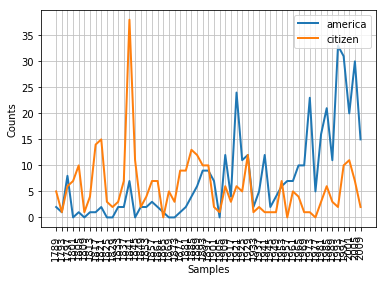

In [66]:
cfd2.plot()

### 生成双连词

In [15]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
print(list(nltk.bigrams(sent)))

[('In', 'the'), ('the', 'beginning'), ('beginning', 'God'), ('God', 'created'), ('created', 'the'), ('the', 'heaven'), ('heaven', 'and'), ('and', 'the'), ('the', 'earth'), ('earth', '.')]


In [84]:
def generate_model(cfdist, word, num=15):
    for i in range(num): 
        print(word, end=' ') # 输出当前单词
        word = cfdist[word].max() # 根据条件概率分布表，找到下一个最有可能的后续词

text = nltk.corpus.genesis.words('english-kjv.txt') # 导入文本
bigrams = nltk.bigrams(text) # 生成双连词对
cfd = nltk.ConditionalFreqDist(bigrams) # 制作条件频率表

generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

## 2.4 词典资源

### 词汇列表语料库

In [16]:
# 查找罕见词
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha()) # 将词汇变成小写
    english_vocab = set(w.lower() for w in nltk.corpus.words.words()) # 获取英文单词表
    unusual = text_vocab - english_vocab
    return sorted(unusual)
print(unusual_words(nltk.corpus.nps_chat.words())[:12])

['aaaaaaaaaaaaaaaaa', 'aaahhhh', 'abortions', 'abou', 'abourted', 'abs', 'ack', 'acros', 'actualy', 'adams', 'adds', 'adduser']


In [17]:
# 停用词
from nltk.corpus import stopwords
print(stopwords.words('english')[:12])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll"]


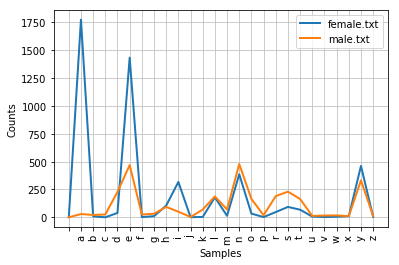

In [90]:
# 查找男/女名的结尾字母分布比例
names = nltk.corpus.names
names.fileids()
male_names = names.words('male.txt')
female_names = names.words('female.txt')
cfd = nltk.ConditionalFreqDist(
 (fileid, name[-1])
 for fileid in names.fileids()
 for name in names.words(fileid))
cfd.plot()

### 发音词典

In [91]:
entries = nltk.corpus.cmudict.entries()
print(len(entries))
for entry in entries[42371:42379]:
    print(entry)

133737
('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


### 比较词表

In [146]:
# 多语言意思比较
from nltk.corpus import swadesh
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [96]:
fr2en = swadesh.entries(['fr', 'en'])
translate = dict(fr2en) # 法语->英语字典
translate['chien']

'dog'

In [99]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142]:
    print(dict(zip(languages, swadesh.entries(languages)[i])))

{'en': 'say', 'de': 'sagen', 'nl': 'zeggen', 'es': 'decir', 'fr': 'dire', 'pt': 'dizer', 'la': 'dicere'}
{'en': 'sing', 'de': 'singen', 'nl': 'zingen', 'es': 'cantar', 'fr': 'chanter', 'pt': 'cantar', 'la': 'canere'}
{'en': 'play', 'de': 'spielen', 'nl': 'spelen', 'es': 'jugar', 'fr': 'jouer', 'pt': 'jogar, brincar', 'la': 'ludere'}
{'en': 'float', 'de': 'schweben', 'nl': 'zweven', 'es': 'flotar', 'fr': 'flotter', 'pt': 'flutuar, boiar', 'la': 'fluctuare'}


### 词汇工具：Toolbox和 Shoebox

In [18]:
from nltk.corpus import toolbox
print(toolbox.entries('rotokas.dic')[0])

('kaa', [('ps', 'V'), ('pt', 'A'), ('ge', 'gag'), ('tkp', 'nek i pas'), ('dcsv', 'true'), ('vx', '1'), ('sc', '???'), ('dt', '29/Oct/2005'), ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'), ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'), ('xe', 'Apoka is gagging from food while talking.')])


## 2.5 WordNet

### 同义词

In [110]:
# 查找同义词集合
from nltk.corpus import wordnet as wn
print(wn.synsets('motorcar'))
print(wn.synset('car.n.01').lemma_names())
print(wn.synset('car.n.01').definition())
print(wn.synset('car.n.01').examples())

[Synset('car.n.01')]
['car', 'auto', 'automobile', 'machine', 'motorcar']
a motor vehicle with four wheels; usually propelled by an internal combustion engine
['he needs a car to get to work']


In [112]:
# 查找词条
print(wn.synset('car.n.01').lemmas())
print(wn.lemma('car.n.01.automobile'))
print(wn.lemma('car.n.01.automobile').synset())

[Lemma('car.n.01.car'), Lemma('car.n.01.auto'), Lemma('car.n.01.automobile'), Lemma('car.n.01.machine'), Lemma('car.n.01.motorcar')]
Lemma('car.n.01.automobile')
Synset('car.n.01')


In [116]:
# 查找单词的所有同义词集
print(wn.lemmas('car'))
for synset in wn.synsets('car'):
    print(synset.lemma_names())

[Lemma('car.n.01.car'), Lemma('car.n.02.car'), Lemma('car.n.03.car'), Lemma('car.n.04.car'), Lemma('cable_car.n.01.car')]
['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


### 上位词与下位词

In [147]:
# 查找下位词
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
print(sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())[:10]) # 所有下位词

['Model_T', 'S.U.V.', 'SUV', 'Stanley_Steamer', 'ambulance', 'beach_waggon', 'beach_wagon', 'bus', 'cab', 'compact']


In [134]:
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [135]:
# 查找上位词
motorcar = wn.synset('car.n.01')
print(motorcar.hypernyms()) # 找到最近的上位词
# 上位词路径
paths = motorcar.hypernym_paths()
print([synset.name() for synset in paths[0]])
print([synset.name() for synset in paths[1]])
print(motorcar.root_hypernyms()) # 最上层的上位词

[Synset('motor_vehicle.n.01')]
['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'container.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']
['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'conveyance.n.03', 'vehicle.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']
[Synset('entity.n.01')]


### 更多的词汇关系

In [137]:
# 名词之间的部分和整体
print(wn.synset('tree.n.01').part_meronyms()) # 由整体查找组成部分
print(wn.synset('tree.n.01').substance_meronyms()) # 由整体查找组成材料
print(wn.synset('tree.n.01').member_holonyms()) # 由部分查找整体

[Synset('burl.n.02'), Synset('crown.n.07'), Synset('limb.n.02'), Synset('stump.n.01'), Synset('trunk.n.01')]
[Synset('heartwood.n.01'), Synset('sapwood.n.01')]
[Synset('forest.n.01')]


In [138]:
# 动词之间的蕴含关系
print(wn.synset('eat.v.01').entailments())

[Synset('chew.v.01'), Synset('swallow.v.01')]


In [139]:
# 反义词
wn.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

### 语义相似度

In [140]:
# 最近上位词
right = wn.synset('right_whale.n.01')
minke = wn.synset('minke_whale.n.01')
print(right.lowest_common_hypernyms(minke))

[Synset('baleen_whale.n.01')]


In [142]:
# 词的深度，越大越具体，越小越抽象
print(wn.synset('baleen_whale.n.01').min_depth())
print(wn.synset('entity.n.01').min_depth())

14
0


In [143]:
# 词的相似性
right.path_similarity(minke)

0.25